In [3]:
!pip install pandas
import  pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'Data science is overlap between arts and science.',
    'easy to learn ',
    'nlp is a part of data science'    
]
import sklearn


In [7]:
tfidf_model = TfidfVectorizer()
print(tfidf_model.fit_transform(corpus).todense())

[[0.36587115 0.36587115 0.36587115 0.27825444 0.         0.27825444
  0.         0.         0.         0.36587115 0.         0.55650888
  0.        ]
 [0.         0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.         0.         0.         0.
  0.57735027]
 [0.         0.         0.         0.34949812 0.         0.34949812
  0.         0.45954803 0.45954803 0.         0.45954803 0.34949812
  0.        ]]


In [10]:
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(corpus).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,and,arts,between,data,easy,is,learn,nlp,of,overlap,part,science,to
0,0.365871,0.365871,0.365871,0.278254,0.00000,0.278254,0.00000,0.000000,0.000000,0.365871,0.000000,0.556509,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735
2,0.000000,0.000000,0.000000,0.349498,0.00000,0.349498,0.00000,0.459548,0.459548,0.000000,0.459548,0.349498,0.00000


In [17]:
tfidf_model_small = TfidfVectorizer(max_features = 10)
tfidf_df_small = pd.DataFrame(tfidf_model_small.fit_transform(corpus).todense())
tfidf_df_small.columns = sorted(tfidf_model_small.vocabulary_)
tfidf_df_small.head()

,and,arts,between,data,easy,is,learn,nlp,of,science
0,0.393129,0.393129,0.393129,0.298984,0.000000,0.298984,0.000000,0.00000,0.00000,0.597969
1,0.000000,0.000000,0.000000,0.000000,0.707107,0.000000,0.707107,0.00000,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.393511,0.000000,0.393511,0.000000,0.51742,0.51742,0.393511


In [18]:
pair1 : 'what you do defines you ' and 'your deeds define you'<br>
pair2 : 'once upon a time  ' and 'king and queen lived'<br>
pair3 : 'he is desperated ' and 'is he not desperated '<br>

SyntaxError: invalid syntax (2939566514.py, line 1)

In [25]:

import nltk
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics.pairwise.cosine_similarity
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\pavania\AppData\Roaming\nltk_data...


In [37]:
pair1 = ['what you do defines you ' , 'your deeds define you']
pair2 = ['once upon a time  ' , ' queen lived']
pair3 = ['he is desperated ' , 'is he not desperated ']

In [46]:
def extract_text_similarity_jaccard(text1,text2):
    word_text1 =[lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text1)]
    word_text2 =[lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text2)]
    nr = len(set(word_text1).intersection(set(word_text2)))
    dr = len(set(word_text1).union(set(word_text2)))
    jaccard_sim= nr/dr
    return jaccard_sim


In [47]:
extract_text_similarity_jaccard(pair1[0],pair1[1])

0.14285714285714285

In [48]:
tfidf_model = TfidfVectorizer()
corpus = [pair1[0],pair2[0]]
tfidf_results  = tfidf_model.fit_transform(corpus).todense()

In [50]:
cosine_similarity(tfidf_results[0],tfidf_results[1])

C:\Users\pavania\Anaconda3\envs\nlp_learning\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\pavania\Anaconda3\envs\nlp_learning\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([[0.]])

In [52]:
#word cloud
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [54]:
from wordcloud import WordCloud ,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_data_sample = fetch_20newsgroups(subset= 'train')
newsgroups_data_sample['data'][:10]


["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

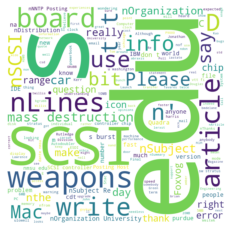

In [57]:
other_stopwords_to_remove = ['\\n','n','\\','>','nline','nI',"n"]
STOPWORDS =STOPWORDS.union(set(other_stopwords_to_remove))
stopwords = set(STOPWORDS)
text = str(newsgroups_data_sample['data'][:10])
wordcloud = WordCloud(width=800,height= 800,
                     background_color='white',
                     max_words=200,
                     stopwords =stopwords,
                     min_font_size=10).generate(text)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

SyntaxError: invalid syntax (3004318277.py, line 1)